In [87]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [81]:
kadfs = []
targets = []
for path in glob.glob("data/*/*"):
    targets.extend([os.path.split(path)[0]] * 30)
    dfs.append(pd.read_csv(path))

In [82]:
tmp_df = pd.concat(dfs)
tmp_df["target"] = targets
tmp_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,target
0,0.062249,3.682282,9.097966,data/idle
1,-0.770933,3.337517,9.045294,data/idle
2,-0.071826,4.630386,9.083601,data/idle
3,0.033519,5.018247,8.140286,data/idle
4,-0.105345,5.295975,7.996634,data/idle
...,...,...,...,...
25,-2.331952,16.510414,-0.009577,data/running
26,-4.505887,23.410503,7.891289,data/running
27,1.005565,-5.420472,4.683059,data/running
28,-6.804321,22.687456,-0.114922,data/running


In [37]:
df = pd.read_csv("df_accelerometer.csv", delimiter=",", index_col=0)

In [43]:
df

,accelerometer_X__median,accelerometer_X__mean,accelerometer_X__maximum,accelerometer_X__minimum,accelerometer_X__standard_deviation,accelerometer_X__variance,accelerometer_X__skewness,accelerometer_X__kurtosis,accelerometer_X__root_mean_square,accelerometer_X__abs_energy,...,accelerometer_Z__variance,accelerometer_Z__skewness,accelerometer_Z__kurtosis,accelerometer_Z__root_mean_square,accelerometer_Z__abs_energy,accelerometer_Z__last_location_of_maximum,accelerometer_Z__first_location_of_maximum,accelerometer_Z__last_location_of_minimum,accelerometer_Z__first_location_of_minimum,kinds
0,0.253785,0.258733,0.287304,0.239420,0.012081,0.000146,0.800004,0.181308,0.259015,2.012667,...,0.000192,-0.309203,-0.633001,9.770268,2863.744197,0.700000,0.666667,0.500000,0.466667,1
1,0.198719,0.387701,2.456451,-1.570596,0.831872,0.692011,1.102881,2.440002,0.917781,25.269682,...,0.722229,-0.138352,1.275052,7.382994,1635.257866,0.966667,0.933333,0.666667,0.633333,1
2,0.153229,0.103908,1.096544,-0.933739,0.513017,0.263186,-0.061341,-0.576334,0.523434,8.219494,...,0.302016,-0.436379,-0.779876,8.600470,2219.042517,0.100000,0.066667,0.933333,0.900000,1
3,-0.567426,-0.516828,1.853112,-1.857900,0.619738,0.384076,1.557623,6.822284,0.806962,19.535612,...,0.389624,-1.228011,0.808916,7.789128,1820.115474,0.033333,0.000000,0.800000,0.766667,1
4,0.220266,0.519861,4.118027,-1.570596,1.138041,1.295138,1.289600,2.382449,1.251157,46.961802,...,2.879332,0.433412,-0.662294,8.382933,2108.206728,0.766667,0.733333,0.333333,0.300000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.033518,1.023282,19.206285,-5.248090,4.707761,22.163016,2.088032,6.289998,4.817688,696.303641,...,71.466316,-1.347021,3.939187,8.583027,2210.050579,0.733333,0.700000,0.800000,0.766667,4
6458,-2.346318,-3.019727,1.240197,-13.962984,3.592400,12.905335,-1.131449,1.360892,4.692983,660.722542,...,36.295119,3.204572,12.140388,6.095523,1114.662040,0.966667,0.933333,0.666667,0.633333,4
6459,-2.798821,-3.416047,1.982399,-10.376471,2.689183,7.231707,-0.522200,0.315340,4.347538,567.032497,...,14.407766,-0.573574,0.120608,4.249764,541.814840,0.133333,0.100000,0.833333,0.800000,4
6460,0.555454,0.591049,16.132132,-11.755530,5.147531,26.497074,0.080877,2.675938,5.181352,805.392368,...,79.411681,1.296524,3.732367,8.930660,2392.700797,0.433333,0.400000,0.266667,0.233333,4


<Axes: xlabel='kinds', ylabel='count'>

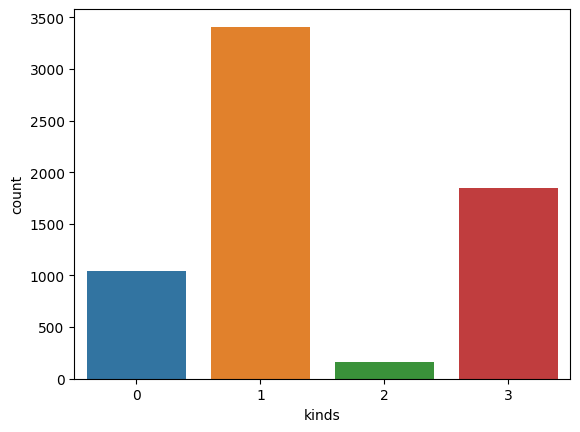

In [97]:
sn.countplot(data=df, x="kinds")

<Axes: xlabel='accelerometer_X__mean', ylabel='Count'>

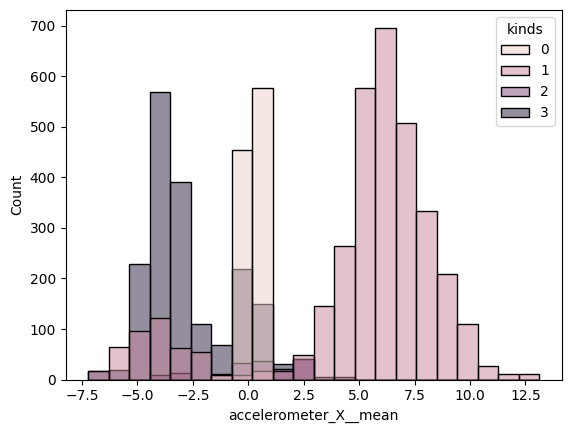

In [98]:
sn.histplot(data=df, x="accelerometer_X__mean", hue="kinds")

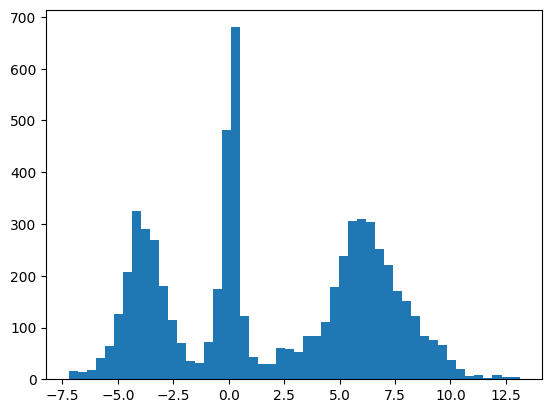

In [93]:
plt.hist(df["accelerometer_X__mean"], bins=50);

In [44]:
df["kinds"] -= 1

In [45]:
df["kinds"].value_counts()

1    3408
3    1850
0    1039
2     165
Name: kinds, dtype: int64

In [46]:
df_cut = df.drop("kinds", axis=1)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df_cut, df["kinds"], test_size=0.2, shuffle=True, stratify=df["kinds"]
)

In [64]:
svc_rbf = SVC(kernel='rbf', C=1, probability=True).fit(X_train, y_train)

y_train_pred__rbf = svc_rbf.predict(X_train)
y_valid_pred__rbf = svc_rbf.predict(X_valid)

In [65]:
ac_train_rbf = accuracy_score(y_train, y_train_pred__rbf)
ac_valid_rbf = accuracy_score(y_valid, y_valid_pred__rbf)

ac_train_rbf, ac_valid_rbf

(0.9535693557748114, 0.951276102088167)

In [99]:
y_valid_pred__rbf

array([1, 1, 1, ..., 1, 3, 3])

In [69]:
f1_sc_train_rbf = f1_score(y_train, y_train_pred__rbf, average=None)
f1_sc_valid_rbf = f1_score(y_valid, y_valid_pred__rbf, average=None)

f1_sc_train_rbf, f1_sc_valid_rbf

(array([0.99223881, 0.97997775, 0.        , 0.92763787]),
 array([0.99047619, 0.97784343, 0.        , 0.92426187]))

<Axes: >

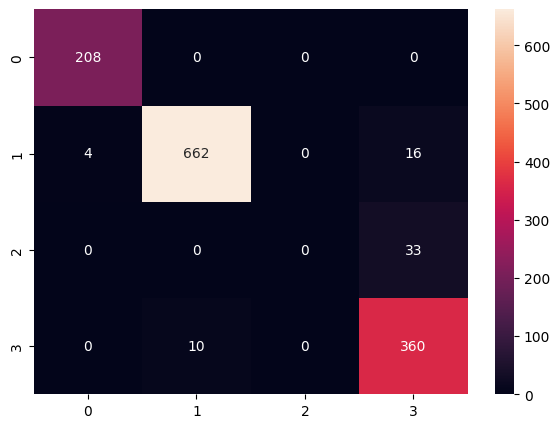

In [90]:
array = confusion_matrix(y_valid, y_valid_pred__rbf)
df_cm = pd.DataFrame(
    array,
    index = [i for i in [0, 1, 2, 3]],
    columns = [i for i in [0, 1, 2, 3]]
)
plt.figure(figsize=(7, 5))
sn.heatmap(df_cm, annot=True, fmt="d")

In [57]:
svc_poly = SVC(kernel='poly', degree=2, C=100, probability=True).fit(X_train, y_train)

y_train_pred_poly = svc_poly.predict_proba(X_train)
y_valid_pred_poly = svc_poly.predict_proba(X_valid)

In [100]:
y_valid_pred_poly

array([[1.07222140e-10, 9.99984792e-01, 5.01141228e-08, 1.51576176e-05],
       [1.40000008e-14, 9.99999850e-01, 5.00000125e-08, 1.00000025e-07],
       [1.27594167e-04, 7.16982997e-03, 3.24416044e-01, 6.68286532e-01],
       ...,
       [1.40000060e-14, 9.99999850e-01, 5.00000450e-08, 1.00000057e-07],
       [9.95408144e-01, 3.49823825e-03, 8.74775610e-04, 2.18842511e-04],
       [1.40000008e-14, 9.99999850e-01, 5.00000125e-08, 1.00000025e-07]])

In [59]:
ac_train_poly = accuracy_score(y_train, np.argmax(y_train_pred_poly, axis=1))
ac_valid_poly = accuracy_score(y_valid, np.argmax(y_valid_pred_poly, axis=1))

ac_train_poly, ac_valid_poly

(0.9791062100986652, 0.9806651198762568)

In [105]:
df = pd.read_csv("/content/data/data_2d.csv", header=None)

In [106]:
df

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [116]:
df[df[0] == 0][1].std(), df[df[0] == 0][2].std()

(1.0092193894831687, 1.0043950631977858)

In [115]:
df[df[0] == 1][1].std(), df[df[0] == 1][2].std()

(1.0913357423318955, 0.9420460172060752)